# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [10]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    #'units = metric' for temperature in Celsius

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
       

         # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({
                "City": city,
                "Lat": city_lat,
                "Lng": city_lng,
                "Max Temp": city_max_temp,
                "Humidity": city_humidity,
                "Cloudiness": city_clouds,
                "Wind Speed": city_wind,
                "Country": city_country,
                "Date": city_date
            })
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-joseph
Processing Record 2 of Set 1 | umm kaddadah
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | constantia
Processing Record 7 of Set 1 | lerma
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | huarmey
Processing Record 10 of Set 1 | carnarvon
Processing Record 11 of Set 1 | bethel
Processing Record 12 of Set 1 | puerto natales
Processing Record 13 of Set 1 | acajutla
Processing Record 14 of Set 1 | san luis de la loma
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | puerto ayora
Processing Record 17 of Set 1 | orange walk
Processing Record 18 of Set 1 | yaren
Processing Record 19 of Set 1 | nchelenge
Processing Record 20 of Set 1 | lihue
Processing Record 21 of Set 1 | blackmans bay
Processing Record 22 of Set 1 |

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-joseph,-21.3667,55.6167,20.21,66,41,4.00,RE,1719759556
1,umm kaddadah,13.6017,26.6876,36.61,25,95,6.72,SD,1719759557
2,port-aux-francais,-49.3500,70.2167,2.19,99,100,10.93,TF,1719759558
3,edinburgh of the seven seas,-37.0676,-12.3116,15.35,98,100,9.34,SH,1719759560
4,adamstown,-25.0660,-130.1015,19.17,55,39,12.17,PN,1719759561


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,20.21,66,41,4.00,RE,1719759556
1,umm kaddadah,13.6017,26.6876,36.61,25,95,6.72,SD,1719759557
2,port-aux-francais,-49.3500,70.2167,2.19,99,100,10.93,TF,1719759558
3,edinburgh of the seven seas,-37.0676,-12.3116,15.35,98,100,9.34,SH,1719759560
4,adamstown,-25.0660,-130.1015,19.17,55,39,12.17,PN,1719759561


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

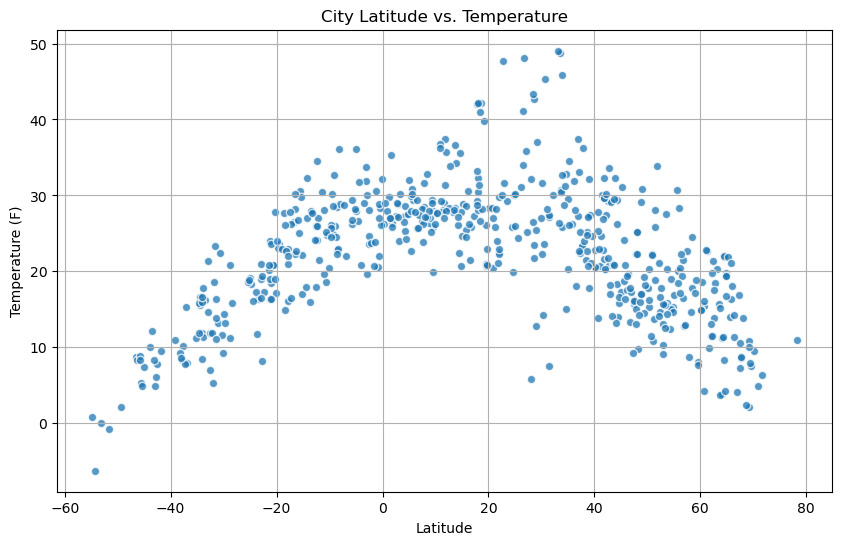

In [16]:
# Build scatter plot for latitude vs. temperature

plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='w', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

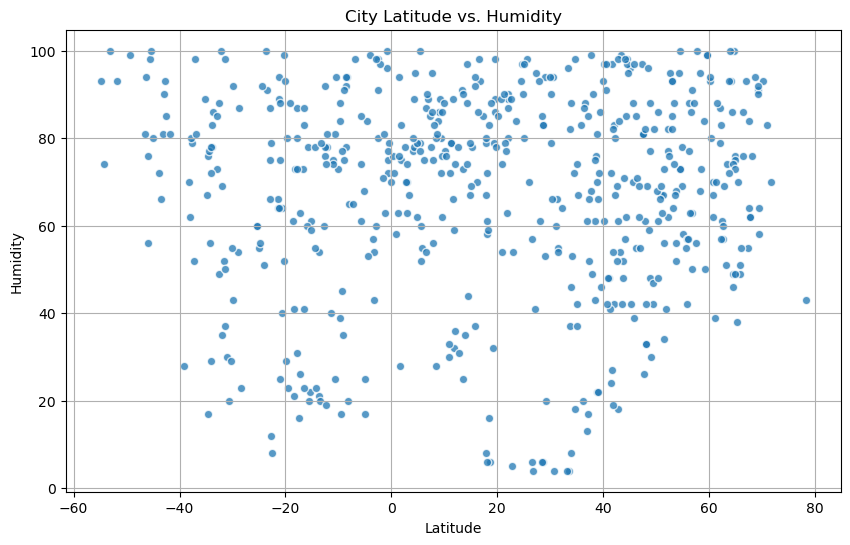

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='w', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

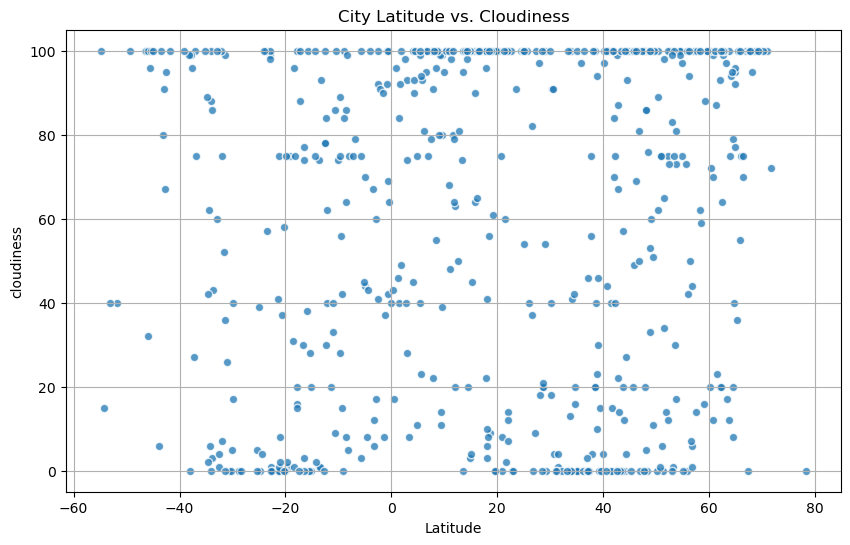

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='w', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('cloudiness')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

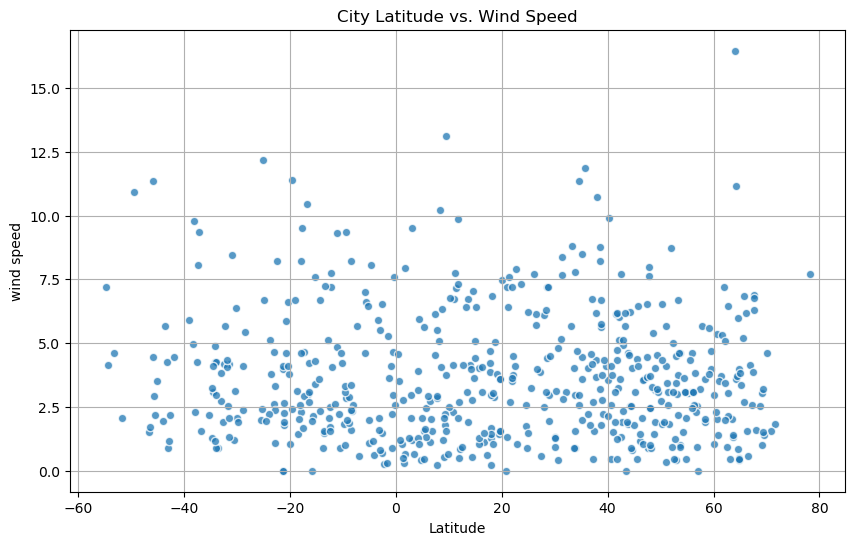

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='w', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('wind speed')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [24]:
# Define a function to create Linear Regression plots
# Define a function to create Linear Regression plots
#(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [25]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,umm kaddadah,13.6017,26.6876,36.61,25,95,6.72,SD,1719759557
5,constantia,44.1833,28.6500,29.38,57,0,6.23,RO,1719759409
6,lerma,42.0261,-3.7598,20.31,42,84,3.25,ES,1719759564
10,bethel,41.3712,-73.4140,30.00,72,40,3.09,US,1719759570
12,acajutla,13.5928,-89.8275,28.34,73,100,1.90,SV,1719759573


In [26]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-joseph,-21.3667,55.6167,20.21,66,41,4.00,RE,1719759556
2,port-aux-francais,-49.3500,70.2167,2.19,99,100,10.93,TF,1719759558
3,edinburgh of the seven seas,-37.0676,-12.3116,15.35,98,100,9.34,SH,1719759560
4,adamstown,-25.0660,-130.1015,19.17,55,39,12.17,PN,1719759561
7,ushuaia,-54.8000,-68.3000,0.81,93,100,7.20,AR,1719759566


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.6426265191904728


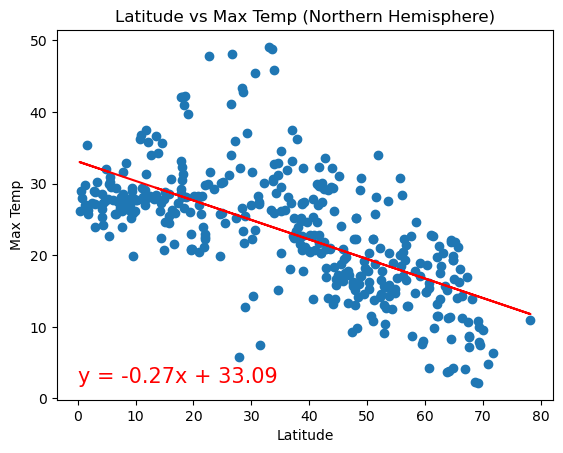

In [42]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, min(y_values)), fontsize=15, color="red") # Adjust placement appropriately
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp (Northern Hemisphere)")

# Print r-value
print(f'The r-value is {rvalue}')  # Printing the correlation coefficient

# Show the plot
plt.show()

The r-value is 0.8576063763439986


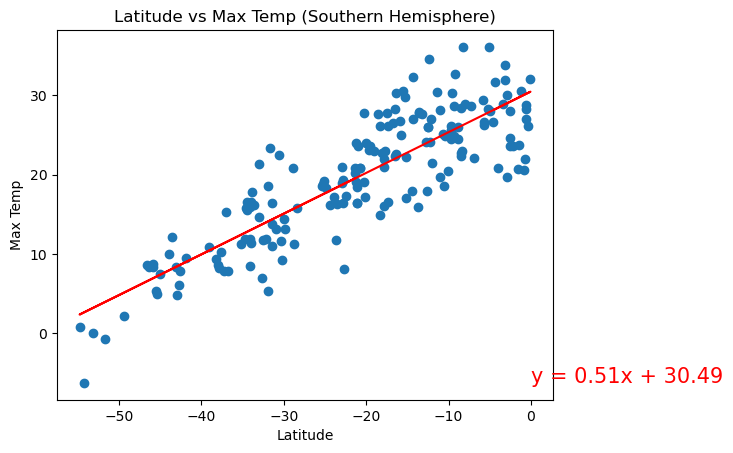

In [43]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, min(y_values)), fontsize=15, color="red") # Adjust placement appropriately
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Max Temp (Southern Hemisphere)")

# Print r-value
print(f'The r-value is {rvalue}')  # Printing the correlation coefficient

# Show the plot
plt.show()

**Discussion about the linear relationship:** The Latitude vs Max Temperature (Northern Hemisphere shows a negative relationship between latitude and temperature. As the latitude increases the temperature decreases. This is because as the latitude increases the distance from the equator increases and temperature descreases as you move away from the equator. On the other hand there seem to be a positive relationship between temperature and latitude in the Southern Hemisphere. As you move closer to the equator, the maximum temperature increases.


### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.003950570756569366


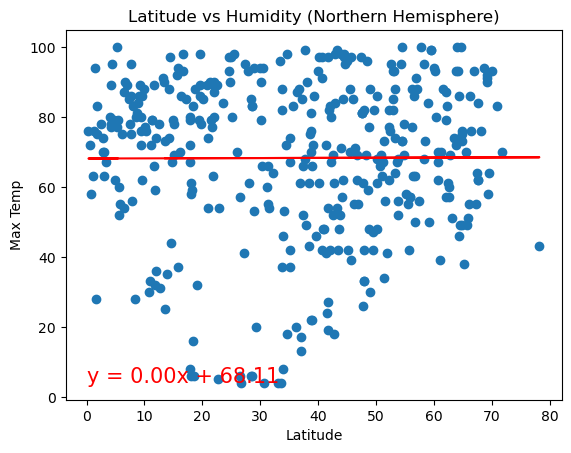

In [44]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, min(y_values)), fontsize=15, color="red") # Adjust placement appropriately
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Humidity (Northern Hemisphere)")

# Print r-value
print(f'The r-value is {rvalue}')  # Printing the correlation coefficient

# Show the plot
plt.show()

The r-value is -0.1027080988897996


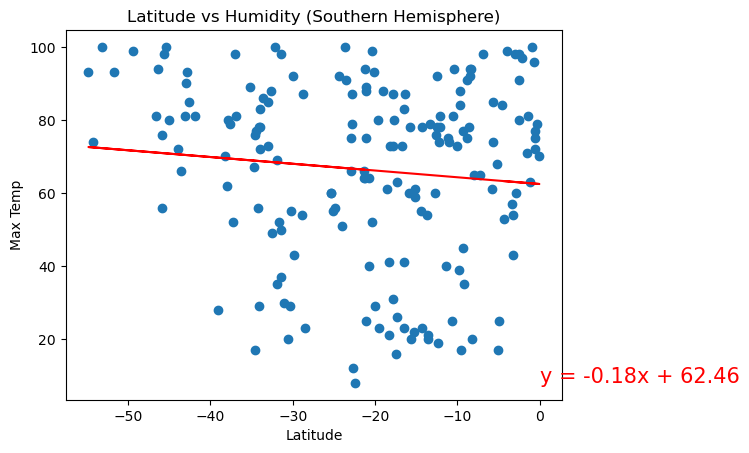

In [45]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Calculate regression values
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

# Plot data
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0, min(y_values)), fontsize=15, color="red") # Adjust placement appropriately
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Latitude vs Humidity (Southern Hemisphere)")

# Print r-value
print(f'The r-value is {rvalue}')  # Printing the correlation coefficient

# Show the plot
plt.show()

**Discussion about the linear relationship:** Latitude vs Humidity (Northern Hemisphere regression line shows no relationship between between latitude and humidity. The Southern hemisphere on the other hand shows a slight negative relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is -0.001990441422291802


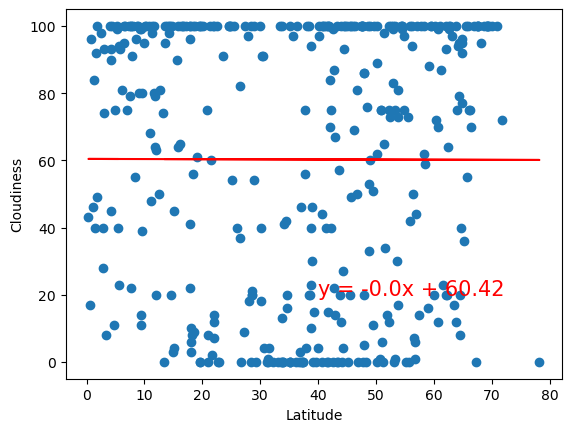

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

The r-value is -0.06881928315439649


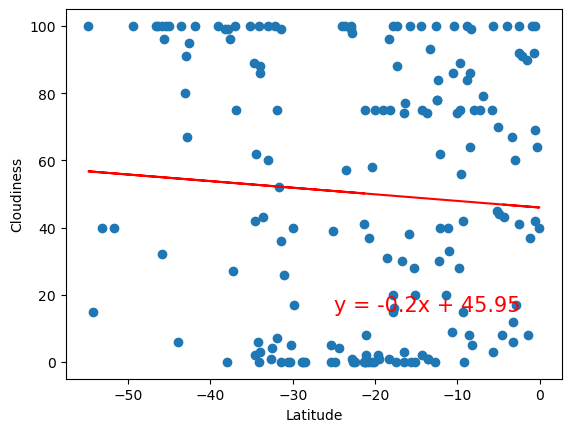

In [47]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,15),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f'The r-value is {rvalue}')

**Discussion about the linear relationship:** Latitude vs Cloudness (Northern Hemisphere regression line shows no relationship between between latitude and cloudness. The Southern hemisphere on the other hand shows a slight negative relationship.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0030342701803218832


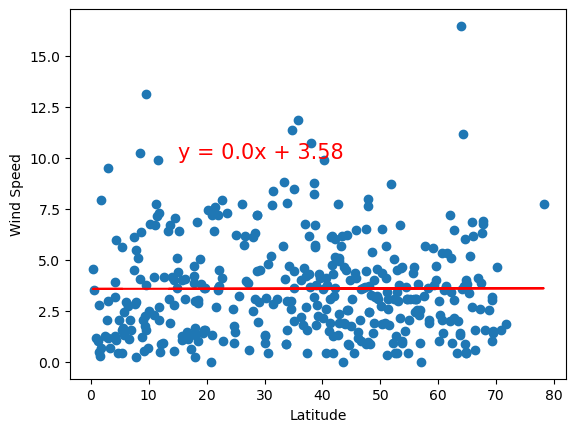

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(15,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')

The r-value is -0.08879502776024273
-----------------------------------


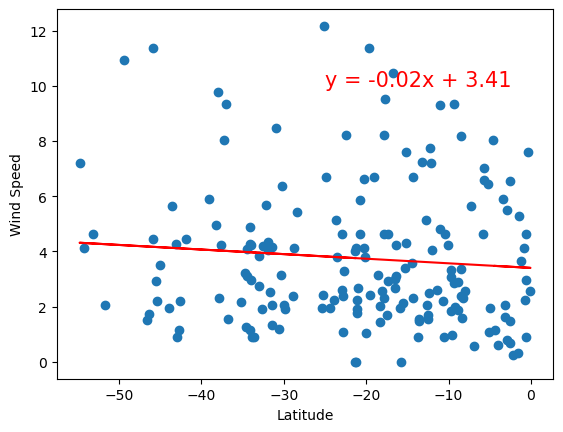

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot values
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
print(f'The r-value is {rvalue}')
print("-----------------------------------")

**Discussion about the linear relationship:** Latitude vs wind speed (Northern Hemisphere regression line shows no correlation between between latitude and wind speed. The Southern hemisphere on the other hand shows a slight correlation.